In [1]:
import numpy as np 
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
df=pd.read_csv(r'C:\Users\elham\Desktop\excel\pulsar_stars.csv')


In [14]:
df.shape

(17898, 9)

In [15]:
df.head(2)

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0


In [16]:
df.columns

Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

In [17]:
df.columns=df.columns.str.strip()

In [18]:
df.columns

Index(['Mean of the integrated profile',
       'Standard deviation of the integrated profile',
       'Excess kurtosis of the integrated profile',
       'Skewness of the integrated profile', 'Mean of the DM-SNR curve',
       'Standard deviation of the DM-SNR curve',
       'Excess kurtosis of the DM-SNR curve', 'Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

In [20]:
df['target_class'].value_counts()

target_class
0    16259
1     1639
Name: count, dtype: int64

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Mean of the integrated profile                17898 non-null  float64
 1   Standard deviation of the integrated profile  17898 non-null  float64
 2   Excess kurtosis of the integrated profile     17898 non-null  float64
 3   Skewness of the integrated profile            17898 non-null  float64
 4   Mean of the DM-SNR curve                      17898 non-null  float64
 5   Standard deviation of the DM-SNR curve        17898 non-null  float64
 6   Excess kurtosis of the DM-SNR curve           17898 non-null  float64
 7   Skewness of the DM-SNR curve                  17898 non-null  float64
 8   target_class                                  17898 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


In [22]:
df.describe()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709,0.091574
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540,0.288432
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504,0.000000
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556,0.000000
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309330,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392141,110.642211,34.539844,1191.000837,1.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x21dda5f5bd0>,
 'caps': [<matplotlib.lines.Line2D at 0x21dda5f7350>,
 'boxes': [<matplotlib.lines.Line2D at 0x21dda563c10>],
 'medians': [<matplotlib.lines.Line2D at 0x21dda608790>],
 'fliers': [<matplotlib.lines.Line2D at 0x21dda609110>],
 'means': []}

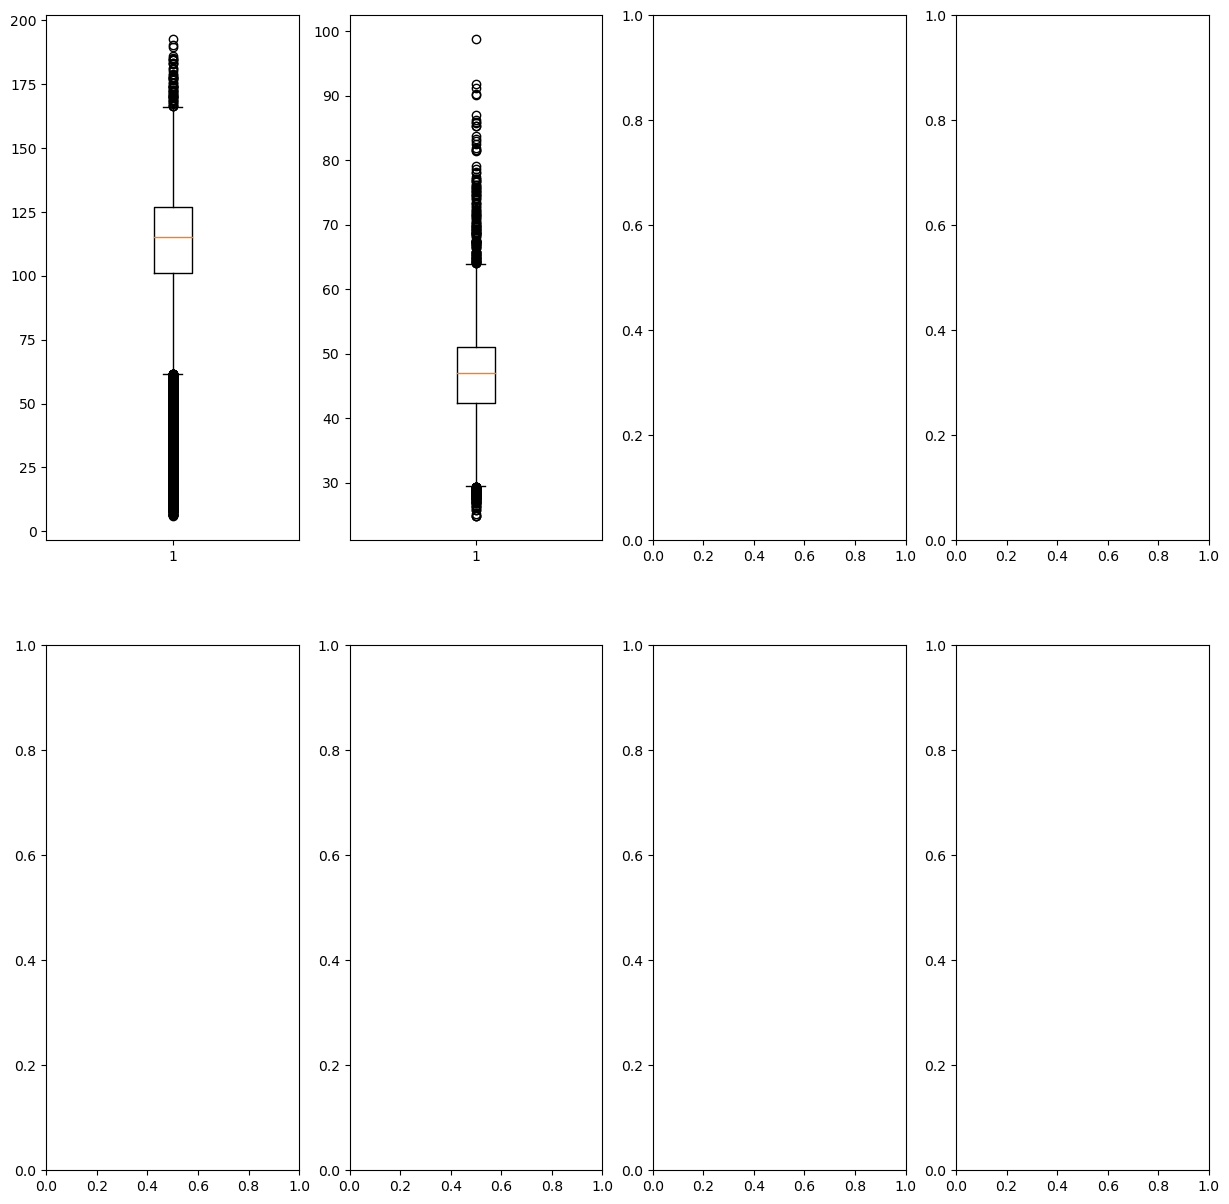

In [27]:
#we see outliers 
fig,ax=plt.subplots(2,4,figsize=(15,15))
ax[0,0].boxplot(df['Mean of the integrated profile'])
ax[0,1].boxplot(df['Standard deviation of the integrated profile'])

In [31]:
x=df.drop('target_class',axis=1)
y=df['target_class']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

In [33]:
x_train.shape,x_test.shape

((13423, 8), (4475, 8))

In [34]:
cols=x_train.columns

In [39]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)
x_train=pd.DataFrame(x_train)
x_test=pd.DataFrame(x_test)
x_train.head(2)

,0,1,2,3,4,5,6,7
0,0.487597,0.134725,-0.483511,-0.24928,-0.314332,-0.082762,-0.066431,-0.373211
1,-0.546831,0.104765,-0.187439,-0.21645,-0.407669,-0.858357,2.716816,3.436280


In [57]:
from sklearn.svm import SVC
model=SVC()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.975195530726257


In [55]:
from sklearn.svm import SVC
model=SVC(kernel='linear',C=100)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.9781005586592179


In [56]:
from sklearn.svm import SVC
model=SVC(kernel='poly',C=100)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.9763128491620112


In [53]:
from sklearn.svm import SVC
model=SVC(kernel='poly',C=1)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.9747486033519553


In [51]:
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
model=SVC(kernel='linear',C=1)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.977877094972067


In [52]:
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
model=SVC(kernel='sigmoid',C=1)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.869050279329609


In [ ]:
from sklearn.model_selection import KFold,cross_val_score,StratifiedKFold
from sklearn.svm import SVC
model=SVC(kernel='sigmoid',C=1)
kf=KFold(n_splits=5,shuffle=True,random_state=42)
cvsc=cross_val_score(model,x,y,cv=kf,scoring='accuracy')

kf2=StratifiedKFold(n_splits=10,shuffle=True,random_state=45)
dff=cross_val_score(model,x,y,kf2,scoring='accuracy')


In [ ]:
print(cvsc)